# Représentation temps-fréquence

In [1]:
import scipy.io.wavfile as wav
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt

Le signal sonore correspond à la gamme musicale jouée au piano.
Sur le signal sonore, les notes sont bien visibles, mais elles sont difficilement identifiables.

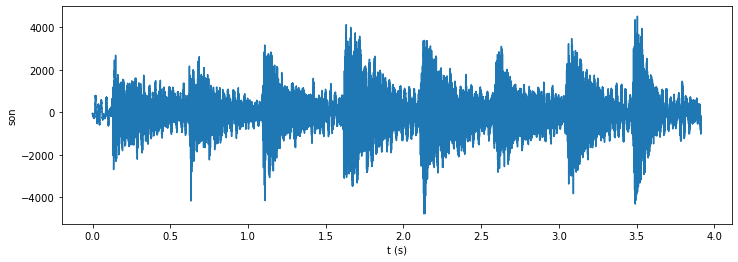

In [2]:
# Chargement du son
# gamme.wav - marianasasousa sur FreeSound : "C major piano scale", 2020.
fe, x = wav.read("../_static/gamme.wav")
N = len(x)

# Affichage
n = np.arange(N)
t = n/fe
plt.figure(figsize=(12,4))
plt.plot(t,x)
plt.xlabel("t (s)")
plt.ylabel("son")
plt.show()

On peut écouter ce son (`fe` est la fréquence d'échantillonnage)...

In [3]:
from IPython.display import Audio
Audio(x, rate=fe)

Le spectre ne permet pas d'identifier les notes jouées car elles sont toutes mélangées puisque l'axe temporel est perdu :

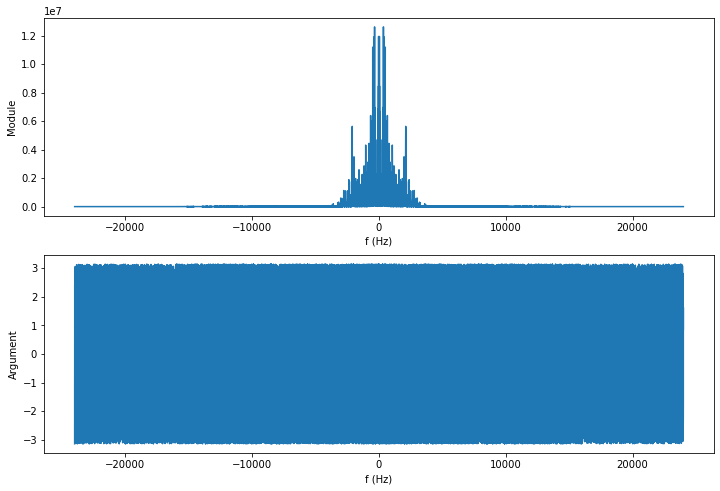

In [4]:
X = fft.fftshift(fft.fft(x))
k = np.arange(N) - np.floor(N/2)
f = k*fe/N

# Affichage
fig, ax = plt.subplots(2,1, figsize=(12,8))
ax[0].plot(f,np.abs(X))
ax[0].set_xlabel("f (Hz)")
ax[0].set_ylabel("Module")
ax[1].plot(f,np.angle(X))
ax[1].set_xlabel("f (Hz)")
ax[1].set_ylabel("Argument")
plt.show()

D'où l'intérêt de la représentation temps-fréquence, ici avec le spectrogramme (et les arguments par défaut).

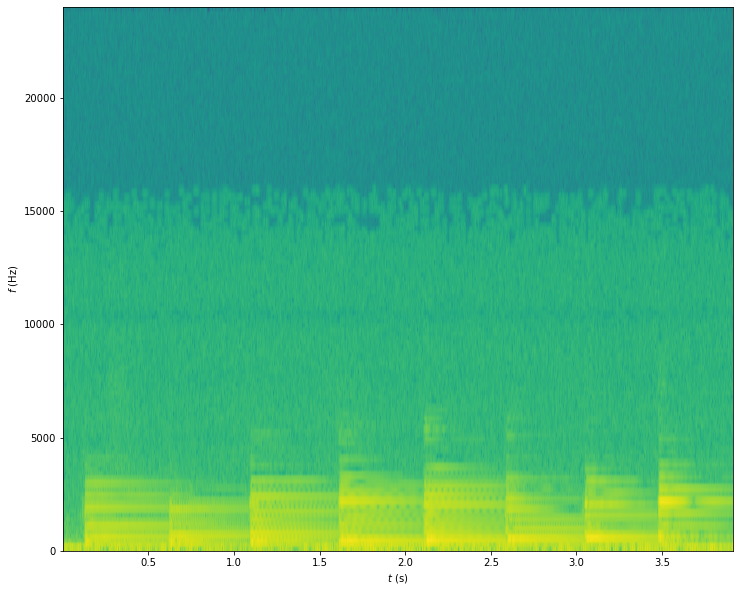

In [5]:
fig = plt.figure(figsize=(12,10))
plt.specgram(x, Fs=fe)
plt.xlabel("$t$ (s)")
plt.ylabel("$f$ (Hz)")
plt.show()

On le voit, la partie intéressante du spectrogramme (celle qui porte l'information), est située sous 5000 Hz. Dans la suite, on n'affichera que cette zone.

In [6]:
def myshow(ax=None, NFFT=None, noverlap=None, vmin=None):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,10))
    else:
        fig = None
    ax.specgram(x, cmap="viridis", Fs=fe, NFFT=NFFT, noverlap=noverlap, vmin=vmin)
    ax.set_xlabel("$t$ (s)")
    ax.set_ylabel("$f$ (Hz)")
    ax.set_ylim([0, 5000])
    return fig

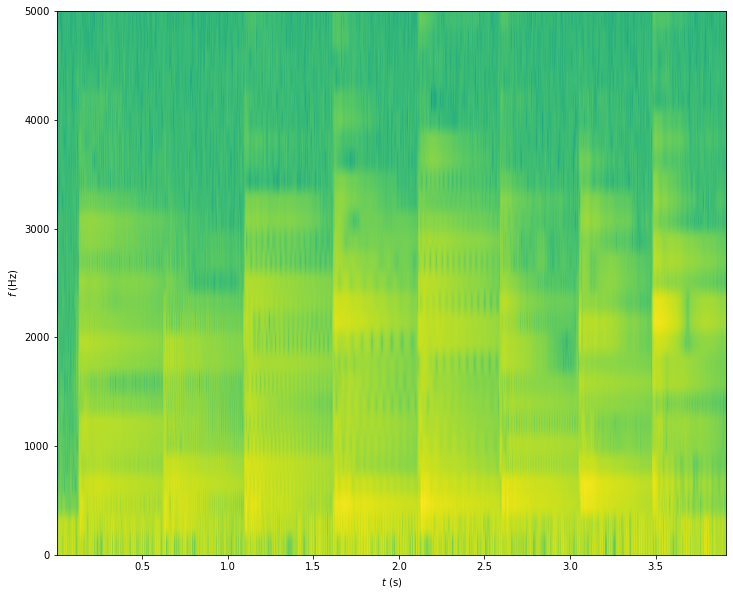

In [7]:
fig = myshow()

Mais cet affichage n'est pas très lisible : la résolution est grossière, surtout en fréquence.
On peut jouer sur les paramètres `NFFT` et `noverlap`.

* `NFFT` est le nombre d'échantillons utilisés pour calculer la TFD (256 par défaut)
* `noverlap` est le nombre d'échantillons en commun entre deux TFD successives (128 par défaut).

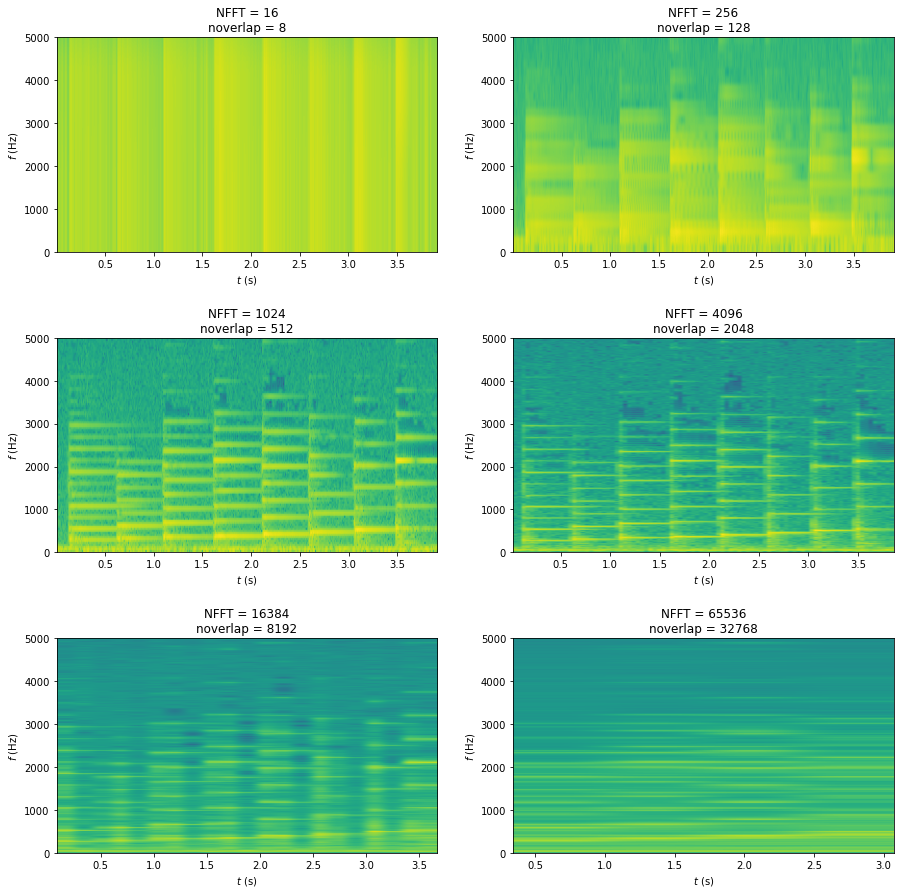

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))
ax = ax.ravel()
plt.subplots_adjust(hspace=.4)
s = 0

for NFFT in 2**np.array([4, 8, 10, 12, 14, 16]):
    noverlap = int(NFFT/2)
    tmp = myshow(ax[s], NFFT, noverlap)
    ax[s].set_title(f"NFFT = {NFFT}\nnoverlap = {noverlap}")
    s += 1

On constate que lorsque `NFFT` augmente, la résolution temporelle diminue (l'affichage est moins précis selon l'axe des temps).
Cela s'explique par le fait que la fenêtre glissante est de plus en plus grande, entraînant moins de décalages possibles
et donc moins de transformée de Fourier calculées.
En même temps, la résolution fréquentielle augmente puisque la taille des transformée de Fourier est identique à la taille des fenêtres (`NFFT`).
C'est le principe d’incertitude de Gabor-Heisenberg : `NFFT` doit être fixé en faisant un compromis entre les résolutions temporelle et fréquentielle.

Dans la suite, on choisit `NFFT` = 4096 et `noverlap` = 2048.
Pour mettre en évidence les harmoniques les plus énergétiques, on modifie l'échelle des couleurs en réglant `vmin`
qui correspond à la valeur en dessous de laquelle toutes les amplitudes sont représentées de la même couleur.

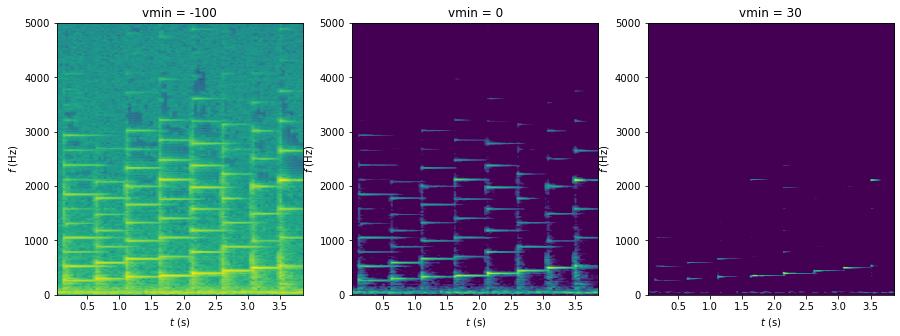

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
s = 0

for vmin in [-100, 0, 30]:
    myshow(ax[s], NFFT=4096, noverlap=2048, vmin=vmin)
    ax[s].set_title(f"vmin = {vmin}")
    s += 1

On trouve donc les fréquences fondamentales de la musique (et donc les notes associées) en adaptant le zoom :

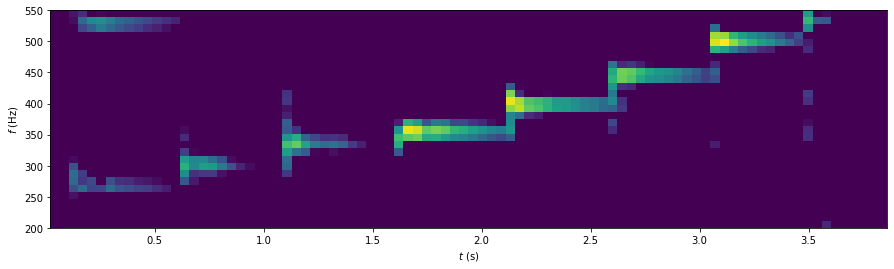

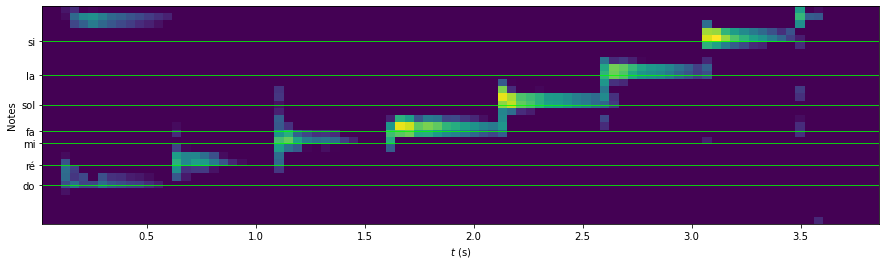

In [10]:
# Zoom
ylim = [200, 550]

# En fonction des fréquences
fig, ax = plt.subplots(1, 1, figsize=(15,4))
myshow(ax, NFFT=4096, noverlap=2048, vmin=30)
ax.set_ylim(ylim)

# En fonction des notes
#notes = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88]
notes = [262, 294, 330, 349, 392, 440, 494]
fig, ax = plt.subplots(1, 1, figsize=(15,4))
myshow(ax, NFFT=4096, noverlap=2048, vmin=30)
ax.set_ylim(ylim)
ax.set_ylabel("Notes")
ax.set_yticks(notes)
ax.set_yticklabels(["do", "ré", "mi", "fa", "sol", "la", "si"])
for n in notes:
    ax.axhline(y=n, color="#00ff00", linewidth=.8)
plt.show()